In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Feature Selection

In [2]:
import pandas as pd
mydata = pd.read_csv('bank-tr.csv')

mydata['cc_tr'] = mydata['cc_tr'].astype('object')
mydata['current_balance'] = mydata['current_balance'].astype('object')
mydata['age'] = mydata['age'].astype('object')
mydata['last_contact_day'] = mydata['last_contact_day'].astype('object')
mydata['last_contact_duration_s'] = mydata['last_contact_duration_s'].astype('object')
mydata['campaign'] = mydata['campaign'].astype('object')
mydata['days_since_last_contact'] = mydata['days_since_last_contact'].astype('object')
mydata['previous'] = mydata['previous'].astype('object')
mydata['poutcome'] = mydata['poutcome'].astype('object')

#Getting all the categorical columns except the target
categorical_columns = mydata.select_dtypes(exclude = 'number').drop('made_deposit', axis = 1).columns
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   accountID                8000 non-null   int64 
 1   town                     8000 non-null   object
 2   country                  8000 non-null   object
 3   age                      8000 non-null   object
 4   job                      8000 non-null   object
 5   married                  8000 non-null   object
 6   education                8000 non-null   object
 7   defaulted?               8000 non-null   object
 8   current_balance          8000 non-null   object
 9   housing                  8000 non-null   object
 10  has_loan                 8000 non-null   object
 11  last_contact             8000 non-null   object
 12  cc_tr                    8000 non-null   object
 13  last_contact_day         8000 non-null   object
 14  last_contact_month       8000 non-null  

In [3]:
from scipy.stats import chi2_contingency

chi2_check = []
for i in categorical_columns:
    if chi2_contingency(pd.crosstab(mydata['made_deposit'], mydata[i]))[1] < 0.05:
        chi2_check.append('Reject Null Hypothesis')
    else:
        chi2_check.append('No Reject Null Hypothesis')
res = pd.DataFrame(data = [categorical_columns, chi2_check] 
             ).T 
res.columns = ['Column', 'Hypothesis']
print(res)

                     Column                 Hypothesis
0                      town  No Reject Null Hypothesis
1                   country  No Reject Null Hypothesis
2                       age     Reject Null Hypothesis
3                       job     Reject Null Hypothesis
4                   married     Reject Null Hypothesis
5                 education     Reject Null Hypothesis
6                defaulted?     Reject Null Hypothesis
7           current_balance     Reject Null Hypothesis
8                   housing     Reject Null Hypothesis
9                  has_loan     Reject Null Hypothesis
10             last_contact     Reject Null Hypothesis
11                    cc_tr  No Reject Null Hypothesis
12         last_contact_day     Reject Null Hypothesis
13       last_contact_month     Reject Null Hypothesis
14  last_contact_duration_s     Reject Null Hypothesis
15                 campaign     Reject Null Hypothesis
16  days_since_last_contact     Reject Null Hypothesis
17        

In [4]:
df = pd.read_csv("bank-tr.csv")

In [5]:
df.head()

,accountID,town,country,age,job,married,education,defaulted?,current_balance,housing,...,last_contact,cc_tr,last_contact_day,last_contact_month,last_contact_duration_s,campaign,days_since_last_contact,previous,poutcome,made_deposit
0,24634684,Crawley,UK,39,management,married,tertiary,no,-190,no,...,unknown,1,11,jun,893,8,-1,0,unknown,yes
1,80795929,Southend-on-Sea,UK,53,housemaid,married,primary,no,362,no,...,cellular,1,28,jul,1169,2,-1,0,unknown,yes
2,30786087,Gillingham,UK,79,retired,divorced,primary,no,2787,no,...,telephone,5,13,jul,617,1,377,1,success,yes
3,38925327,Gateshead,UK,43,services,single,secondary,no,550,yes,...,cellular,4,13,may,107,2,-1,0,unknown,no
4,30560733,Eastbourne,UK,35,technician,single,secondary,no,344,no,...,cellular,2,27,aug,519,16,-1,0,unknown,yes


In [6]:

newdf = df[['age','job', 'married','education', 'defaulted?','current_balance','housing','has_loan','last_contact','last_contact_day','last_contact_month','last_contact_duration_s','campaign','previous','poutcome','made_deposit']].copy()


# Data Preparation 

In [7]:
newdf = newdf[newdf.last_contact_month != 'j']
newdf = newdf[newdf.has_loan != 'n']

In [8]:
newdf.isnull().sum()

age                        0
job                        0
married                    0
education                  0
defaulted?                 0
current_balance            0
housing                    0
has_loan                   0
last_contact               0
last_contact_day           0
last_contact_month         0
last_contact_duration_s    0
campaign                   0
previous                   0
poutcome                   0
made_deposit               0
dtype: int64

In [9]:
df.groupby('has_loan')['accountID'].nunique()

has_loan
n         5
no     6963
yes    1031
Name: accountID, dtype: int64

In [10]:
Q1 = newdf.quantile(0.25)
Q3 = newdf.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                          17.00
current_balance            1574.00
last_contact_day             14.00
last_contact_duration_s     363.75
campaign                      2.00
previous                      1.00
dtype: float64


In [11]:
Q1 = newdf['current_balance'].quantile(0.25)
Q3 = newdf['current_balance'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

1574.0


In [12]:
print((newdf['current_balance'] < (Q1 - 1.5 * IQR)) | (newdf['current_balance'] > (Q3 + 1.5 * IQR)))

0       False
1       False
2       False
3       False
4       False
        ...  
7995    False
7996    False
7997    False
7998    False
7999    False
Name: current_balance, Length: 7994, dtype: bool


In [13]:
print(newdf['current_balance'].skew())
newdf['current_balance'].describe()

8.34862967968697


count     7994.000000
mean      1517.068802
std       3169.485002
min      -3058.000000
25%        120.000000
50%        545.500000
75%       1694.000000
max      81204.000000
Name: current_balance, dtype: float64

In [14]:
print(newdf.skew())

age                        0.875432
current_balance            8.348630
last_contact_day           0.109078
last_contact_duration_s    2.192756
campaign                   5.852508
previous                   7.895618
dtype: float64


In [15]:
print(newdf['last_contact_duration_s'].quantile(0.10))
print(newdf['last_contact_duration_s'].quantile(0.90))

77.0
838.0


In [16]:
newdf["last_contact_duration_s"] = np.where(newdf["last_contact_duration_s"] <77.0, 77.0,newdf['last_contact_duration_s'])
newdf["last_contact_duration_s"] = np.where(newdf["last_contact_duration_s"] >838.0, 838.0,newdf['last_contact_duration_s'])
print(newdf['last_contact_duration_s'].skew())

0.843852404810913


In [17]:
print(newdf['current_balance'].quantile(0.10))
print(newdf['current_balance'].quantile(0.90))

0.0
3872.199999999999


In [18]:
newdf["current_balance"] = np.where(newdf["current_balance"] <0.0, 0.0,newdf['current_balance'])
newdf["current_balance"] = np.where(newdf["current_balance"] >3868.600000000002, 3868.600000000002,newdf['current_balance'])
print(newdf['current_balance'].skew())

1.1429002417912795


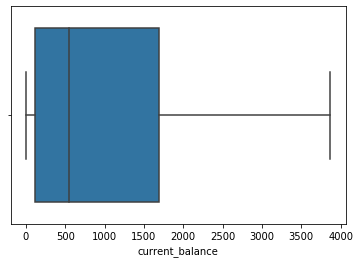

In [19]:
import seaborn as sns
sns.boxplot(x=newdf['current_balance'])

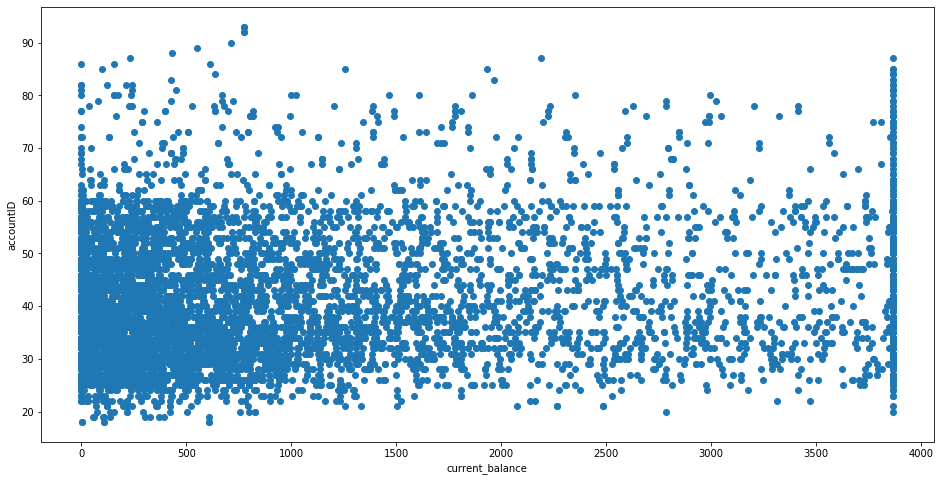

In [20]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(newdf['current_balance'], newdf['age'])
ax.set_xlabel('current_balance')
ax.set_ylabel('accountID')
plt.show()

In [21]:
print(newdf['current_balance'].skew())
newdf['current_balance'].describe()

1.1429002417912795


count    7994.000000
mean     1111.386415
std      1281.899962
min         0.000000
25%       120.000000
50%       545.500000
75%      1694.000000
max      3868.600000
Name: current_balance, dtype: float64

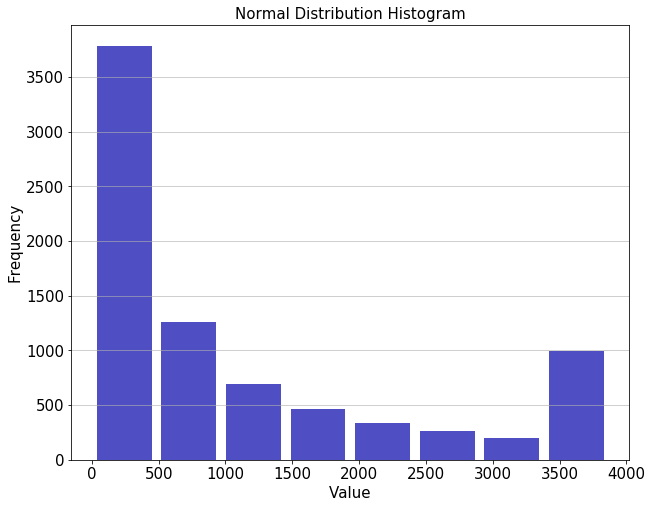

In [22]:
plt.figure(figsize=[10,8])
n, bins, patches = plt.hist(newdf['current_balance'], bins=8, color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Normal Distribution Histogram',fontsize=15)
plt.show()

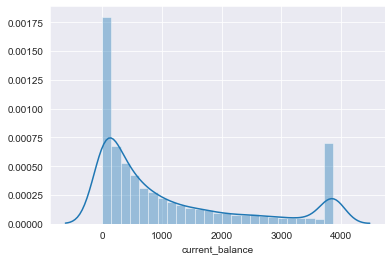

In [23]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(newdf['current_balance'])

In [ ]:
categorical_cols = newdf.select_dtypes(np.object).columns
numerical_cols = newdf.select_dtypes(np.number).columns
#print('All Categorical Coulmns with Type: ', categorical_cols)
print('All Features: ', numerical_cols)

In [24]:
print('Frequencies of each label in the dataset: ')
newdf['made_deposit'].value_counts(normalize=True)

Frequencies of each label in the dataset: 


no     0.521641
yes    0.478359
Name: made_deposit, dtype: float64

In [ ]:
newdf.shape

In [25]:
newdf = pd.get_dummies(newdf, prefix_sep='_', columns=['last_contact_month', 'job','last_contact' ,'married', 'education', 'defaulted?', 'housing', 'has_loan', 'poutcome'],drop_first=True)


In [26]:
cd = ['last_contact_month_aug','last_contact_month_jan','last_contact_month_jun','last_contact_month_nov','job_housemaid','job_management','job_technician','job_unemployed','job_unknown','last_contact_telephone','education_unknown']


newdf = newdf.drop(columns=cd, axis=1)

In [27]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7994 entries, 0 to 7999
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      7994 non-null   int64  
 1   current_balance          7994 non-null   float64
 2   last_contact_day         7994 non-null   int64  
 3   last_contact_duration_s  7994 non-null   float64
 4   campaign                 7994 non-null   int64  
 5   previous                 7994 non-null   int64  
 6   made_deposit             7994 non-null   object 
 7   last_contact_month_dec   7994 non-null   uint8  
 8   last_contact_month_feb   7994 non-null   uint8  
 9   last_contact_month_jul   7994 non-null   uint8  
 10  last_contact_month_mar   7994 non-null   uint8  
 11  last_contact_month_may   7994 non-null   uint8  
 12  last_contact_month_oct   7994 non-null   uint8  
 13  last_contact_month_sep   7994 non-null   uint8  
 14  job_blue-collar         

In [28]:
targetName="made_deposit"
newdf.columns.get_loc(targetName)
featureNames=newdf.columns[np.where(newdf.columns != targetName)]
X = newdf[featureNames].values
y = newdf[targetName].values.ravel()

In [29]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
X = mm_scaler.fit_transform(X)

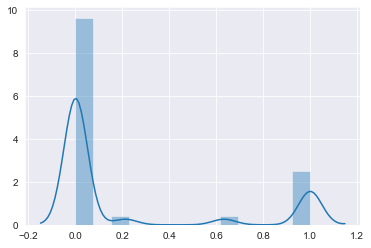

In [30]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(X[22])

# Split Data

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

# First model - LogisticRegression

In [134]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(penalty='l1',solver='liblinear',multi_class='ovr' ,random_state=1)
logisticRegr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1', random_state=1,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [135]:
predictions = logisticRegr.predict(X_test)

In [136]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.8205128205128205


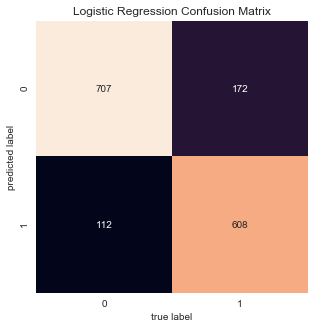

In [70]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, predictions)
plt.figure(figsize=(5,5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Logistic Regression Confusion Matrix');

# 2nd model - DecisionTreeClassifier

In [77]:
from sklearn.tree import DecisionTreeClassifier
TreeClassifier = DecisionTreeClassifier(criterion='entropy',splitter='random',max_depth=10,min_samples_split=2,
                                        min_samples_leaf=2)
TreeClassifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [78]:
predictions2 = TreeClassifier.predict(X_test)

In [79]:
score2 = TreeClassifier.score(X_test, y_test)
print(score2)

0.8311444652908068


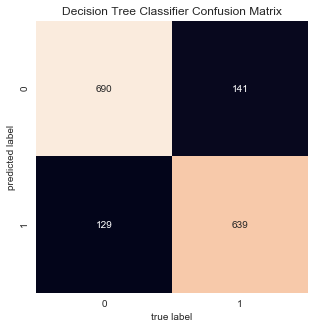

In [80]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, predictions2)
plt.figure(figsize=(5,5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('Decision Tree Classifier Confusion Matrix');

# 3rd model - 

In [213]:
from sklearn.neural_network import MLPClassifier
MLPClassifier = MLPClassifier(activation='tanh',hidden_layer_sizes=(200,23),solver='sgd')
MLPClassifier.fit(X_train, y_train)

/Users/khalfanalkindi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(200, 23), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [214]:
predictions3 = MLPClassifier.predict(X_test)

In [215]:
score3 = MLPClassifier.score(X_test, y_test)
print(score3)

0.8267667292057536


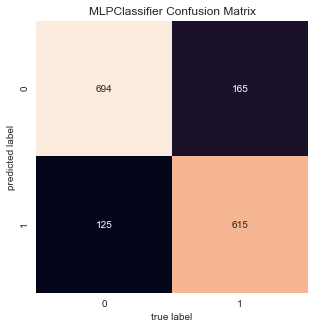

In [203]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, predictions3)
plt.figure(figsize=(5,5))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
plt.title('MLPClassifier Confusion Matrix');

# Models Comparison

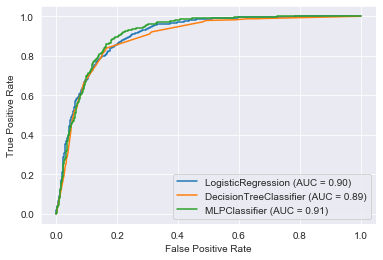

In [143]:
from sklearn.metrics import plot_roc_curve
#disp = metrics.plot_roc_curve(logisticRegr,X_test, y_test),
#metrics.plot_roc_curve(TreeClassifier,X_test, y_test),
#metrics.plot_roc_curve(MLPClassifier,X_test, y_test);
 
disp = plot_roc_curve(logisticRegr, X_test, y_test) 
plot_roc_curve(TreeClassifier, X_test, y_test, ax=disp.ax_);
plot_roc_curve(MLPClassifier, X_test, y_test, ax=disp.ax_);

In [147]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(logisticRegr, X_test, y_test, cv=5)
scores.mean()

0.8242652821316614

In [148]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(TreeClassifier, X_test, y_test, cv=5)
scores.mean()

0.7786206896551724

In [189]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(MLPClassifier, X_test, y_test, cv=5)
scores.mean()

/Users/khalfanalkindi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/khalfanalkindi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/khalfanalkindi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/khalfanalkindi/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterati

0.8255113636363637